# EDA of Haberman's cancer dataset from kaggle.
# Author: Anup Subedi

# Task: To classify the patients if they live or die in 5 years.(<i>scary right?)

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns




<i>Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer.</i>
Source:https://www.kaggle.com/gilsousa/habermans-survival-data-set)

In [2]:
data = pd.read_csv('haberman.csv') #importing and reading the dataset(*.csv file) 
print(data)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
300   74    63      0       1
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2

[305 rows x 4 columns]


# 1. Number of datapoints 

In [3]:
data.shape 


(305, 4)

In [4]:
datapoint_count = 306*4
print(datapoint_count)

1224


# 2. Number of features and their names

In [5]:
x = data.columns[:-1] #since last column is a label/class so exclude it.
print(x)

Index(['age', 'year', 'nodes'], dtype='object')


<i>There are 4 attribute in this data set out of which 3 are features and 1 class attribute as below.
Number of Axillary nodes(Lymph Nodes)<br>
1.Age<br>
2.Operation Year<br>
3.No.of Auxillary nodes(Lymph Nodes)<br>  
3.Survival Status(class)

In [6]:
len(x)

3

# Number of classes

In [7]:
classes_number = data['status'].unique() 
print(classes_number)

[1 2]


In [8]:
data['status'].value_counts()

status
1    225
2     80
Name: count, dtype: int64

# Objective:
To classify the patients according to the given features as 1 or 2.
<b>(1 = lives longer than 5 years, 2 = lives less than 5 years)</b>


# Analysis:


<b><h3>Bivariate analysis( 2D scatter plots, pair-plots)


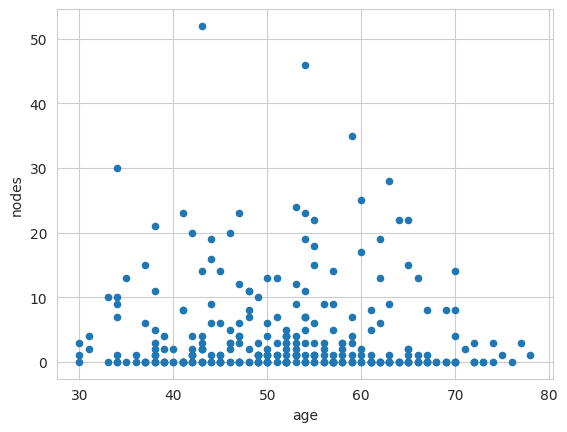

In [9]:
sns.set_style("whitegrid");
data.plot( x = 'age', y = 'nodes', kind = 'scatter')

plt.show()

<b><h3>OBSERVATION:<br>
    It is impossible to classify the labels from the above graph. So we use seaborn package's functions to distinguish the survival status or classes of dataset visually.

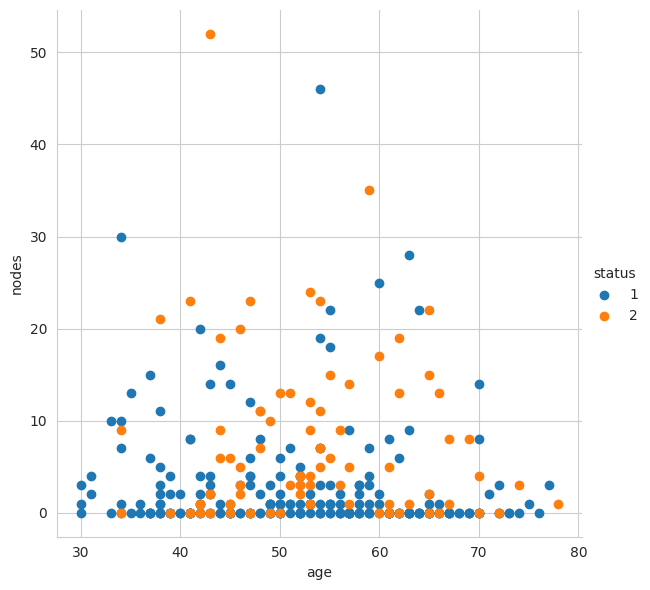

In [10]:

sns.FacetGrid(data, hue = 'status', height = 6)\
.map(plt.scatter, 'age',  'nodes' )\
.add_legend();
plt.show()

<b>I import functions from seaborn library like FacetGrid due to which we are able to distinguish between the data classification.<br>Here blue dots represent survival more than 5 years and orange dots represent survival less than 5 years.

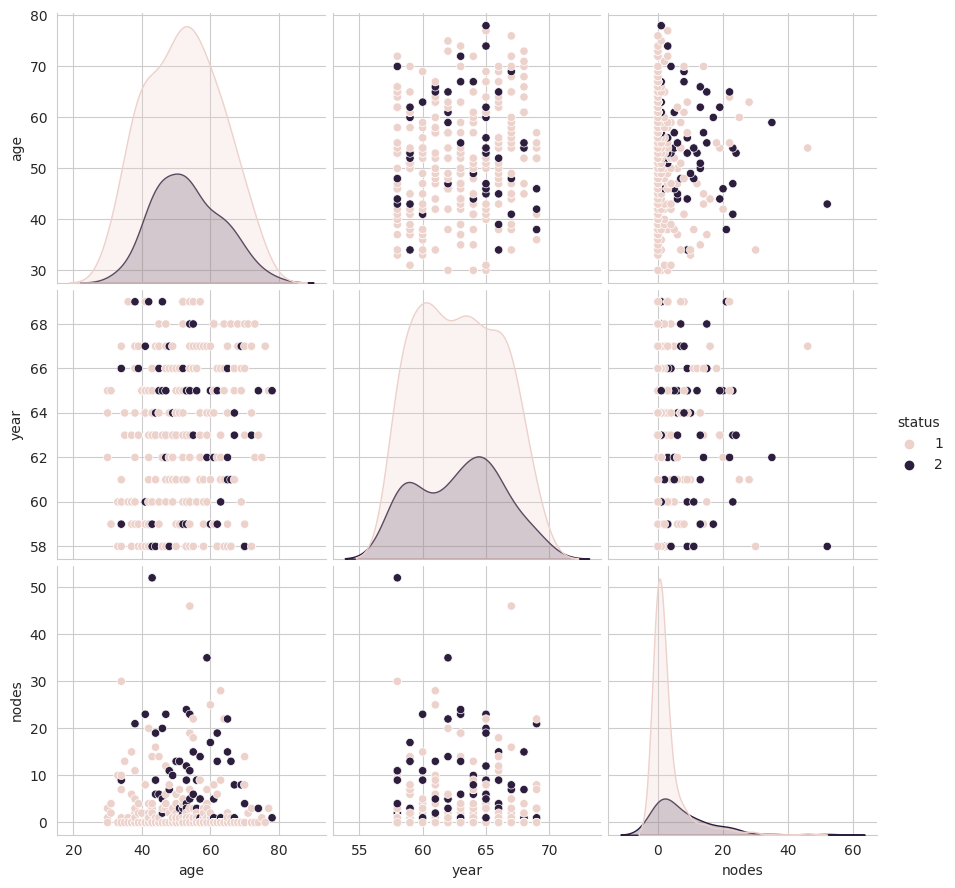

In [11]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(data, hue='status', height=3, vars= ['age','year', 'nodes'])
plt.show()

<b><h3>observation:<br></h3>I select the plot no. 7 or 3 as in it the points are less overlapped compared to other plots.

<h2><b>Univariate analysis(1D plot, CDF, PDF, Boxplot, Violin plot)

In [12]:
 long_survived = data.loc[data['status'] == 1 ];    #dataframe of patients having survival status more than 5 years

In [13]:
print(long_survived)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
298   73    68      0       1
300   74    63      0       1
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1

[225 rows x 4 columns]


In [14]:
 short_survived = data.loc[data['status'] == 2 ]; #dataframe of patients having survival status less than 5 years
    

In [15]:
print(short_survived)


     age  year  nodes  status
7     34    59      0       2
8     34    66      9       2
24    38    69     21       2
34    39    66      0       2
43    41    60     23       2
..   ...   ...    ...     ...
285   70    58      0       2
286   70    58      4       2
293   72    63      0       2
299   74    65      3       2
304   78    65      1       2

[80 rows x 4 columns]


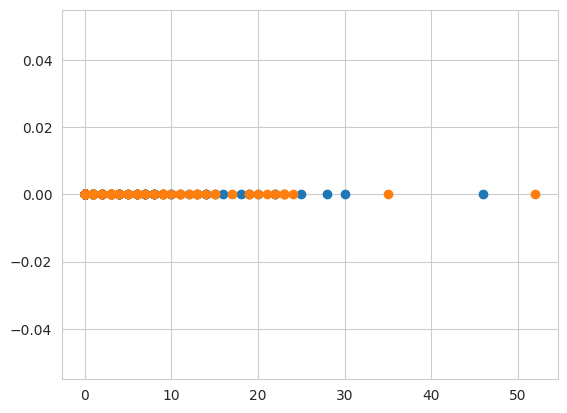

In [16]:
plt.plot(long_survived['nodes'], np.zeros(long_survived['nodes'].shape), 'o')
plt.plot(short_survived['nodes'], np.zeros(short_survived['nodes'].shape), 'o')

<b>OBSERVATION:</b><br> Here we can observe the data of short survival status are mostly overlap on long survival status<br> due to which you will not able to conclude on this data.

we can get better clarification if you use PDF or CDF of data for plotting.



/home/anups/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/anups/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


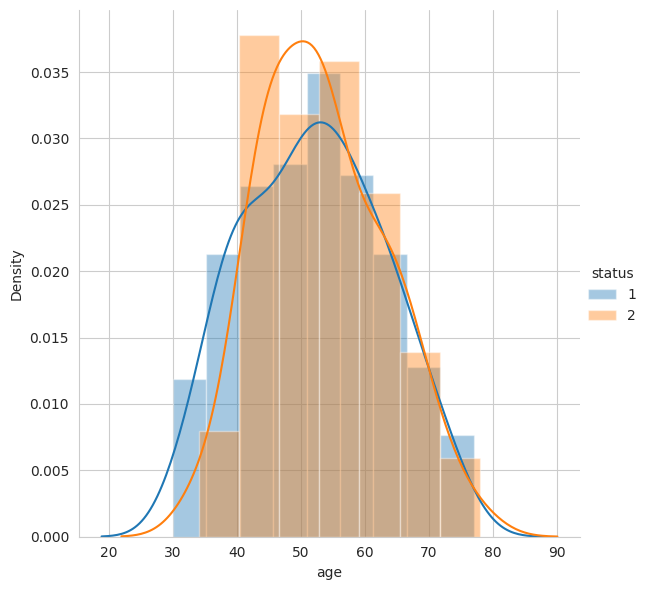

In [17]:
sns.FacetGrid(data, hue = 'status', height = 6)\
.map(sns.distplot, 'age')\
.add_legend();
plt.show()

/home/anups/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/anups/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


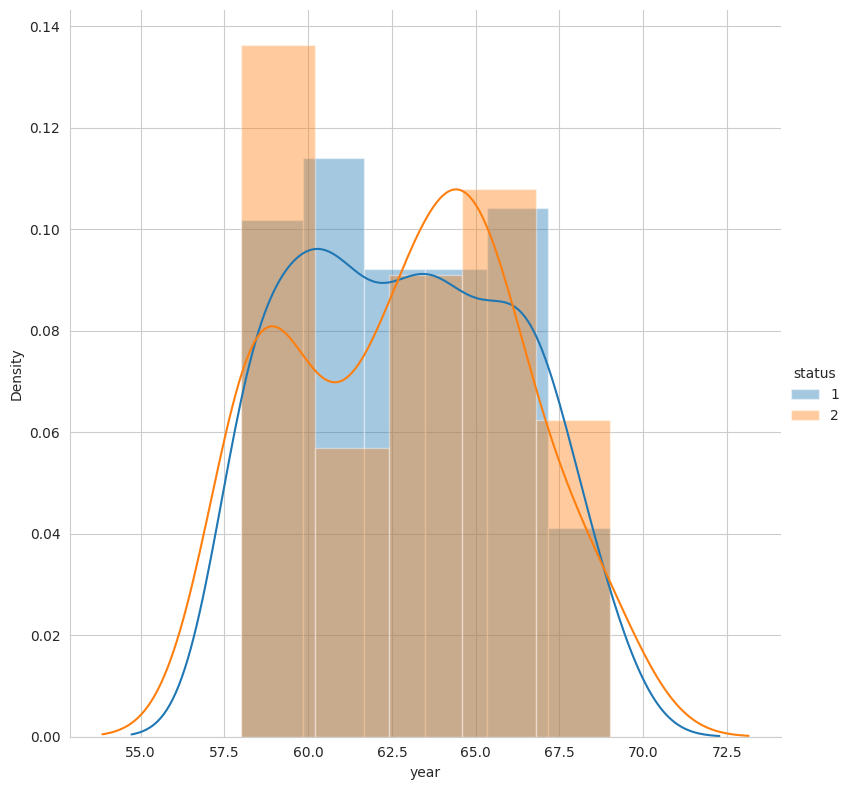

In [18]:
sns.FacetGrid(data, hue = 'status', height = 8)\
.map(sns.distplot, 'year')\
.add_legend();
plt.show()

/home/anups/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/anups/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


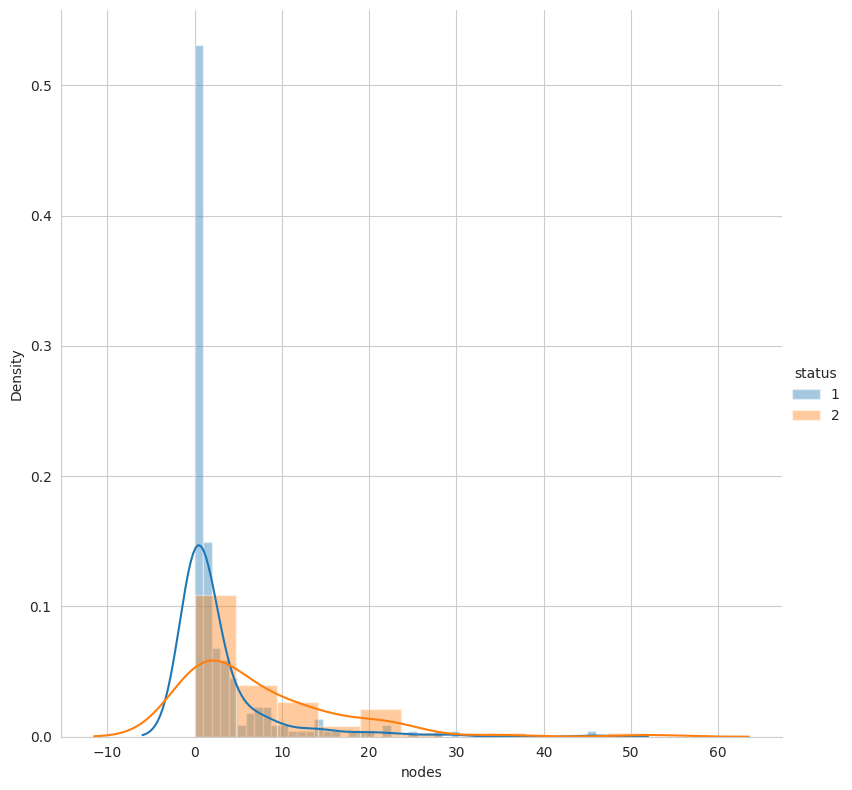

In [19]:
sns.FacetGrid(data, hue = 'status', height = 8)\
.map(sns.distplot, 'nodes')\
.add_legend();
plt.show()

<b>OBSERAVTION:<br>
 The PDFs of attributes 'age' and 'year' are more overlapped with each other so I choose 'nodes'(Auxillary nodes) 

In [20]:
#I accept the PDF of Axillary nodes and can conclude below result:

def predict(node):
    if node <= 0:
        result = "Longer survival"
    elif node >= 0 and node <= 3.5:#(approx)
        result = "Longer survival chances are high"
    elif node >  3.5:
        result = 'Short survival'
    else:
        result = 'Invalid input'
        
    return result   

node = int(input('Enter number of Lymph Nodes:'))
predict(node)
   



Enter number of Lymph Nodes:2


'Longer survival chances are high'

So from above PDF we can say the patients survival status, but we cannot exactly say what percentage of patient will actually short survive or long survive. To know that we have another distribution that is CDF.

CDF will give the cumulative plot of PDF so that you can calculate what are the exact percentage of patient survival status



[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


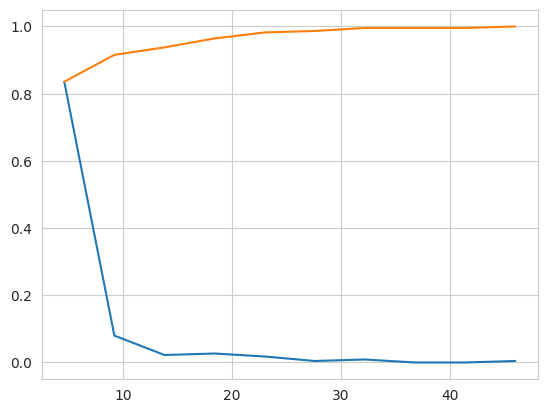

In [21]:
counts, bin_edges = np.histogram(long_survived['nodes'], bins = 10, density = True)
pdf = counts/sum(counts) #counts are the no. of nodes in a interval.
#for eg: [2,3,5], there are 2 nodes in first interval , 3 in second and 5 in third. the sum(count) gives the sum of these three counts 
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#The CDF of Long survival status is shown on plot in orange colour.

<b>OBSERAVTION:</b><br>
 we can observe that orange line shows there is a 85% chance of long survival if number of axillary nodes detected are < 5<br>
 We can see as number of axillary nodes increases survival chances also reduces means it is clearly observed that 80% — 85% of people have good chances of survival if they have less no. of auxillary nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >40
    

[0.5625 0.15   0.1375 0.05   0.075  0.     0.0125 0.     0.     0.0125]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


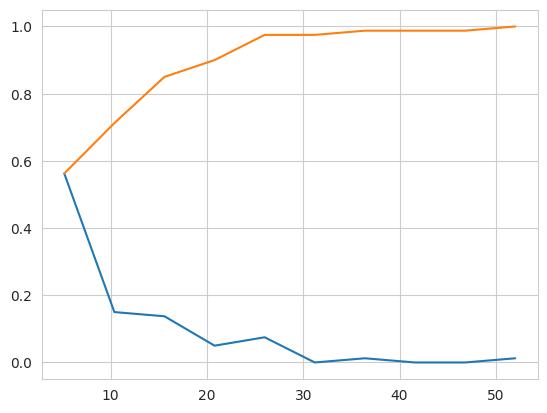

In [22]:
counts, bin_edges = np.histogram(short_survived['nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

[0.5625 0.15   0.1375 0.05   0.075  0.     0.0125 0.     0.     0.0125]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


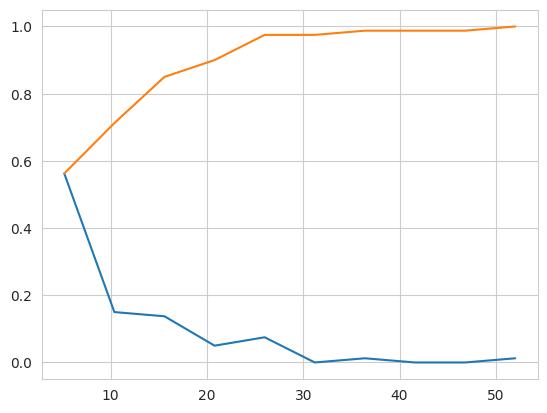

In [23]:

counts, bin_edges = np.histogram(long_survived['nodes'], bins = 10, density = True)
counts, bin_edges = np.histogram(short_survived['nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

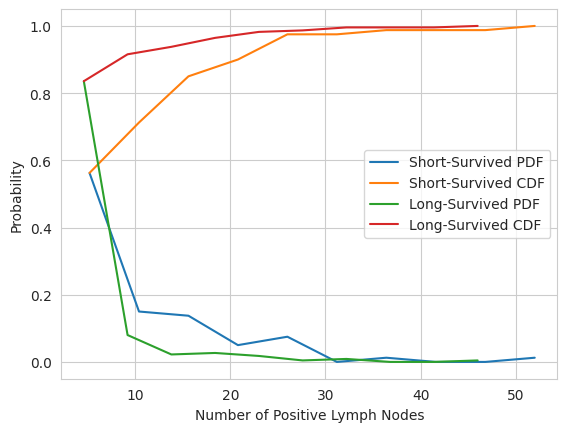

In [24]:
counts_long, bin_edges_long = np.histogram(long_survived['nodes'], bins=10, density=True)
pdf_long = counts_long / sum(counts_long)
cdf_long = np.cumsum(pdf_long)

counts_short, bin_edges_short = np.histogram(short_survived['nodes'], bins=10, density=True)
pdf_short = counts_short / sum(counts_short)
cdf_short = np.cumsum(pdf_short)

# Plot PDF and CDF for both short and long-survived patients on the same graph
plt.plot(bin_edges_short[1:], pdf_short, label='Short-Survived PDF')
plt.plot(bin_edges_short[1:], cdf_short, label='Short-Survived CDF')
plt.plot(bin_edges_long[1:], pdf_long, label='Long-Survived PDF')
plt.plot(bin_edges_long[1:], cdf_long, label='Long-Survived CDF')
plt.legend()
plt.xlabel('Number of Positive Lymph Nodes')
plt.ylabel('Probability')
plt.show()

<b>OBSERVATION:</b><br> It is observed that for short lived patients if the node < 5 the chance of long survival is 55%(approx.) and chance of short survival is 100% if node > 40

<i>However,We can also predict patients status by applying mathematical formulae like Standard Deviation and Mean.

In [25]:
print('Long survived patient\'s mean:')
np.mean(long_survived['nodes'])



Long survived patient's mean:


2.7911111111111113

In [26]:
#adding an outliner
np.mean(np.append(long_survived['nodes'],50))

3.0

In [27]:
print('Short survived patient\'s mean:')
np.mean(short_survived['nodes'])

Short survived patient's mean:


7.525

In [28]:
print('Long survived patient\'s std.deviation:')
np.std(long_survived['nodes'])



Long survived patient's std.deviation:


5.857258449412138

In [29]:
print('Long survived patient\'s std.deviation:')
np.std(short_survived['nodes'])

Long survived patient's std.deviation:


9.165117293302908

<i>Here we can see in line 3, I have added outlier(data which is very large or small compare to respective data. It may be an error or exception case while collecting data) even though the mean of data is not much affected.<br></i>
    <b>OBSERVATION:</b>
You can observe that for Long survive mean is 2.79 and including outlier it is 3 that is almost same, but the mean of Short survive is 7.4 which is comparatively much higher than Long survive. So the probability for short survive is more in data set.

If you observe the standard deviation Long survive has standard deviation of only 2.79 and Short survive has 7.45, means the spread of data for short survive is more.



In [30]:

print('Medians:')
print(np.median(long_survived['nodes']))
print(np.median(np.append(long_survived['nodes'],50)))
print(np.median(short_survived['nodes']))
print('\nQuantiles:')
print(np.percentile(long_survived['nodes'],np.arange(0,100,25)))
print(np.percentile(short_survived['nodes'],np.arange(0,100,25)))
print('\n90th percentile:')
print(np.percentile(long_survived['nodes'],90))
print(np.percentile(short_survived['nodes'],90))



Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.    1.    4.   11.25]

90th percentile:
8.0
20.10000000000001


<b>Observation</b>:

From above observation it is clear that average axillary nodes in long survival is 0 and for short survival it is 4. ie, Patients who have average 4 auxillary nodes have short survival status.
Quantiles shows that nearly 50th% of axillary nodes are 0 in long survival and 75th% of patients have nodes less than 3 that is 25% patients are having nodes more than 3.
Similarly, In short survival 75th% of patients have minimum 11 nodes detected.
At 90th% there if nodes detected is >8 then it has long survival status and if nodes are >20 then patients will have short survival status

<h2>Conclusion:</h2><h3>We can diagnose the Cancer using Haberman’s Data set by applying various data analysis techniques and using various Python libraries. Some other techniques to visual datas are <b>boxplots, contour plots, violin plots.

